# Titanic 生存分析

Kaggle入門經典題，參考HanXiaoyang哥的這篇：  
https://github.com/HanXiaoyang/Kaggle_Titanic/blob/master/Titanic.ipynb  

更重要的是：自已做一遍


In [30]:
import pandas as pd
import numpy as np

# 載入資料
# Kaggle已經整理好了漂亮的資料，但真實世界往往不是這樣
df = pd.read_csv('raw/train.csv')

# 先大概看一下
print('Data shape: {}'.format(df.shape))

Data shape: (891, 12)


In [31]:
# 看一下有那些欄位
# 要理解每個欄位的意義，建立起對資料的感覺，對後續的分析很重要。
print(df.columns)

# Kaggle網頁裡會有這些欄位的說明：
# SibSp: siblings / spouses 兄弟姐妹配偶
# parch: of parents / children aboard the Titanic
# Pclass: Ticket class, 分三個等級
# embarked: 登船地點

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [32]:
# 觀察資料的完整性
# 有沒有缺少？如果缺了，要怎麼處理呢？
df.info()

# Age跟Cabin欄位就有缺了！
# 一共有891列，有Age的才714列，而Cabin更只有204列有資料。對缺資料的點如何處理會是一個重要的議題。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [33]:
# 統計資料
df.describe()

# 問：pandas裡使用describe()跟info()有什麼不同？
# 答：describe是統計資料的描述， 統計資料很有用，但對於文字型的資料內容無法統計，所以搭配info()了解資料概況。

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


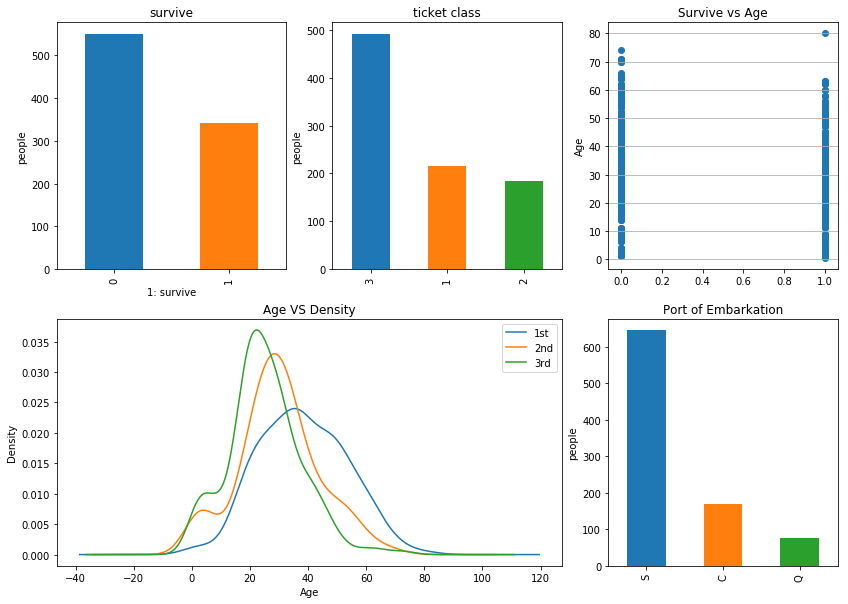

In [34]:
# 來畫圖看看
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 10))
fig.set(alpha=0.1)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0)) # 一個大圖切成許多個小圖
df.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title('survive') # puts a title on our graph
plt.ylabel('people')  
plt.xlabel('1: survive')

plt.subplot2grid((2,3),(0,1))
df.Pclass.value_counts().plot(kind="bar")
plt.ylabel('people')
plt.title('ticket class')

plt.subplot2grid((2,3),(0,2))
plt.scatter(df.Survived, df.Age)
plt.ylabel('Age')                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title('Survive vs Age')

plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')# plots an axis lable
plt.ylabel('Density') 
plt.title('Age VS Density')
plt.legend(('1st', '2nd', '3rd'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar')
plt.title('Port of Embarkation')
plt.ylabel('people')  

plt.show()

   survive  die
1      136   80
2       87   97
3      119  372


<Figure size 432x288 with 0 Axes>

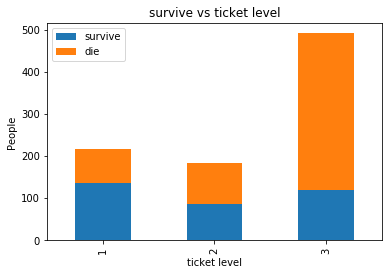

In [35]:
# 看看船艙等級與存活之間的關系

# 這裡有維度上的變化，X軸呈現船艙等級，共有三級
# Y軸呈現人數，並把存活跟死亡做分色處理。所以Y軸是根據Survive條件做Count
fig = plt.figure()
fig.set(alpha=0.2)


Survived_0 = df.Pclass[df.Survived == 0].value_counts()
Survived_1 = df.Pclass[df.Survived == 1].value_counts()

# df.Pclass 是一個乘客對艙等的Series
# df.Pclass[df.Srvived == 0] 也是一個Series，根據未存活乘客做過濾。
# 經過.value_counts()計數後，變成艙等對人數(存活/未存活)的關系
# 把資料印出來看一下變換的過程
# 記得要開一份原始資料對照著看更有感覺


#print(df.Pclass)
#print(df.Pclass[df.Survived == 0])
#print(df.Pclass[df.Survived == 0].value_counts())

# 兩個Series整合成一個Dataframe
df1 = pd.DataFrame({'survive':Survived_1, 'die':Survived_0})
print(df1)

df1.plot(kind='bar', stacked=True)
plt.title('survive vs ticket level')
plt.xlabel('ticket level') 
plt.ylabel('People') 


plt.show()

# 一等艙的獲救機率看起來有比較高


   male  female
0   468      81
1   109     233


<Figure size 432x288 with 0 Axes>

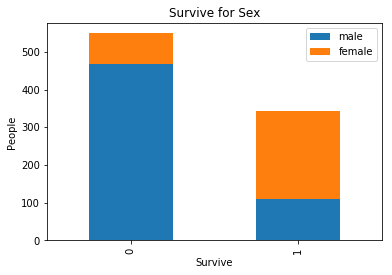

In [36]:
# 性別與存活的關系

fig = plt.figure()
fig.set(alpha=0.2)


Survived_m = df.Survived[df.Sex == 'male'].value_counts()
Survived_f = df.Survived[df.Sex == 'female'].value_counts()

df1 = pd.DataFrame({'male':Survived_m, 'female':Survived_f})
print(df1)
df1.plot(kind='bar', stacked=True)
plt.title('Survive for Sex')
plt.xlabel('Survive') # x軸的意義，在HanXiaoyang的參考連結裡有筆誤，誤寫為性別了，這裡更正為存活與否。
plt.ylabel('People')
plt.show()

# 解讀：
# 1) 0為死亡，藍色為男，橘色為女，男的佔比高。
# 2) 1為存活
# 女性存活率高

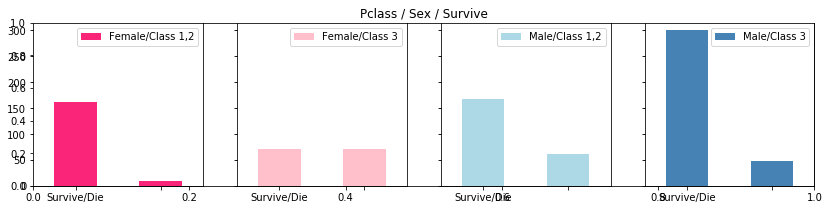

In [37]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(14, 3))
fig.set(alpha=0.65)
plt.title('Pclass / Sex / Survive')

# subplot 大圖裡放小圖
# .add_subplot(141) 表示這些小圖是 1 row, 4 columns,目前位置是 1
# pandas裡方括號類似SQL的where過濾語法
ax1=fig.add_subplot(141)
df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts().plot(
    kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(['Survive/Die'], rotation=0)
ax1.legend(['Female/Class 1,2'], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts().plot(
    kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(['Survive/Die'], rotation=0)
plt.legend(['Female/Class 3'], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts().plot(
    kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(['Survive/Die'], rotation=0)
plt.legend(['Male/Class 1,2'], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(['Survive/Die'], rotation=0)
plt.legend(['Male/Class 3'], loc='best')

plt.show()

# 重點來了，看看Cabin(船艙)
Cabin資料缺很大哦！如何應對？  
1) 探究一下為何會缺，會不會有線索？  
2) 退一步看，有/無Cabin是否會對生存率有影響？可以探究一下  
HanXiaoyang給了四個建議：  
1) 缺值項太多的話，拿來用的話，引進的雜訊可能都大於益處了，可以考慮就不要了吧。  
2) 缺值若是非連續性的，那就引入NaN  
3) 缺值若是連續性的，可以切割一下，做出一些群組，離散化，然後引入NaN  
4) 缺值若是連續性的，也可以試算一下，用差補點的方式，把中間的值補進去。(可不可以這樣做，就取決於對資料意義的理解力了)  
   比如透過隨機樹林做預測，來補入年齡缺值。  


1    136
0     68
Name: Survived, dtype: int64
0    481
1    206
Name: Survived, dtype: int64


<Figure size 432x288 with 0 Axes>

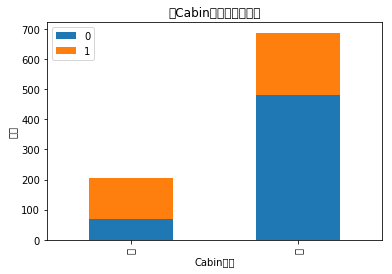

In [38]:
#cabin的值计数太分散了，绝大多数Cabin值只出现一次。感觉上作为类目，加入特征未必会有效
#那我们一起看看这个值的有无，对于survival的分布状况，影响如何吧
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = df.Survived[pd.notnull(df.Cabin)].value_counts()
Survived_nocabin = df.Survived[pd.isnull(df.Cabin)].value_counts()

print(Survived_cabin)
print(Survived_nocabin)

df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

#似乎有cabin记录的乘客survival比例稍高，那先试试把这个值分为两类，有cabin值/无cabin值，一会儿加到类别特征好了

In [26]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

df, rfr = set_missing_ages(df)
df = set_Cabin_type(df)
df

/home/handy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/handy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C
